In [1]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import geopandas as gpd
import pandas as pd
import glob
import zipfile
# import rasterio
import os
import xarray as xr
import json

Populating the interactive namespace from numpy and matplotlib


In [3]:
from pathlib import Path
# dmPath = Path('../../Data_v1_1_Daymet')
dmPath = Path('../../Data_v1_1_Daymet')
print('Daymet Path exists: ', dmPath.exists())
dmFile = Path(list(dmPath.glob('*_tmax_1980*.nc4'))[0])
ds = None
if dmFile.exists():
    ds = xr.open_dataset(dmFile).sel(time=slice('1980-01-01'))
    ds2 = ds.where((ds.lat >= 20) & (ds.lat <= 54) & (ds.lat >= -126) & (ds.lat <= -65))
#     dsday = ds.sel(time=slice('1980-01-01'))
#     ds2 = dsday.where((ds.lat >= 20) & (ds.lat <= 54) & (ds.lat >= -126) & (ds.lat <= -65))
    #delaware = temp.where((ds.lon>=-77) & (ds.lon<=-74) & (ds.lat>=38) & (ds.lat<=43), drop=True)-273.5
    print(ds)
else:
    print('Daymet file does not exist', dmFile)

Daymet Path exists:  True
<xarray.Dataset>
Dimensions:                  (nv: 2, time: 1, x: 7814, y: 8075)
Coordinates:
  * x                        (x) float32 -4560250.0 -4559250.0 ... 3252750.0
  * y                        (y) float32 4984000.0 4983000.0 ... -3090000.0
    lat                      (y, x) float32 58.527702 58.536274 ... 10.001372
    lon                      (y, x) float32 ...
  * time                     (time) datetime64[ns] 1980-01-01T12:00:00
Dimensions without coordinates: nv
Data variables:
    yearday                  (time) int16 ...
    time_bnds                (time, nv) datetime64[ns] ...
    lambert_conformal_conic  int16 ...
    tmax                     (time, y, x) float32 ...
Attributes:
    start_year:        1980
    source:            Daymet Software Version 3.0
    Version_software:  Daymet Software Version 3.0
    Version_data:      Daymet Data Version 3.0
    Conventions:       CF-1.6
    citation:          Please see http://daymet.ornl.gov/ for 

In [5]:
ds2 = xr.open_dataset('tmax_test2.nc')
ds2

<xarray.Dataset>
Dimensions:                  (time: 1, x: 6008, y: 3699)
Coordinates:
  * y                        (y) float32 1687.0 1686.0 ... -2010.0 -2011.0
  * x                        (x) float32 -2754.25 -2753.25 ... 3251.75 3252.75
  * time                     (time) datetime64[ns] 2018-12-31
Data variables:
    lat                      (y, x) float32 ...
    lambert_conformal_conic  int16 ...
    lon                      (y, x) float32 ...
    prcp                     (time, y, x) float32 ...
    srad                     (time, y, x) float32 ...
    swe                      (time, y, x) float32 ...
    tmax                     (time, y, x) float32 ...
    tmin                     (time, y, x) float32 ...
    vp                       (time, y, x) float32 ...
Attributes:
    _NCProperties:       version=1|netcdflibversion=4.4.1|hdf5libversion=1.8.17
    start_year:          1980
    source:              Daymet Software Version 3.0
    Version_software:    Daymet Software Version 3.0
    Version_data:        Daymet Data Version 3.0
    Conventions:         CF-1.6
    citation:            Please see http://daymet.ornl.gov/ for current Dayme...
    references:          Please see http://daymet.ornl.gov/ for current infor...
    title:               Daymet: Daily Surface Weather Data on a 1-km Grid fo...
    institution:         Oak Ridge National Laboratory Distributed Active Arc...
    end_year:            2018
    History:             Translated to CF-1.0 Conventions by Netcdf-Java CDM ...
    geospatial_lat_min:  18.552629168112905
    geospatial_lat_max:  58.1720239604238
    geospatial_lon_min:  -143.08286944629194
    geospatial_lon_max:  -50.72062839852924

In [10]:
print(ds.x.min(), ds.x.max())
print(ds2.x.min(), ds2.x.max())
print(ds2.y.min(), ds2.y.max())

<xarray.DataArray 'x' ()>
array(-4560250., dtype=float32) <xarray.DataArray 'x' ()>
array(3252750., dtype=float32)
<xarray.DataArray 'x' ()>
array(-2754.25, dtype=float32) <xarray.DataArray 'x' ()>
array(3252.75, dtype=float32)
<xarray.DataArray 'y' ()>
array(-2011., dtype=float32) <xarray.DataArray 'y' ()>
array(1687., dtype=float32)


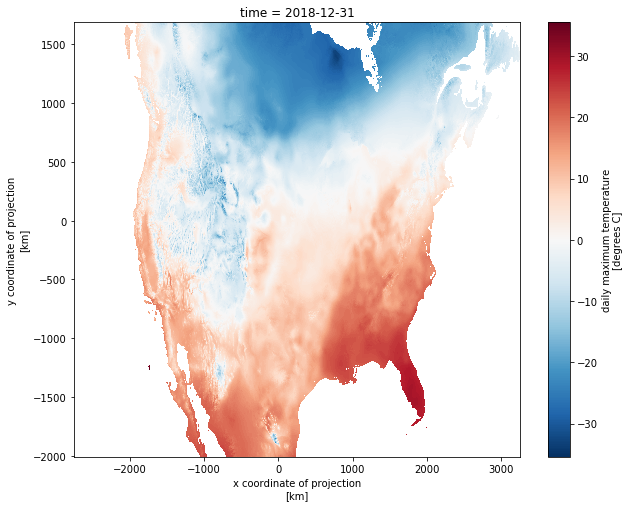

In [11]:
ds2.tmax.plot()

In [27]:
tv = ds.tmax.values

(1, 8075, 7814)
50.0
-50.0
-4.910309


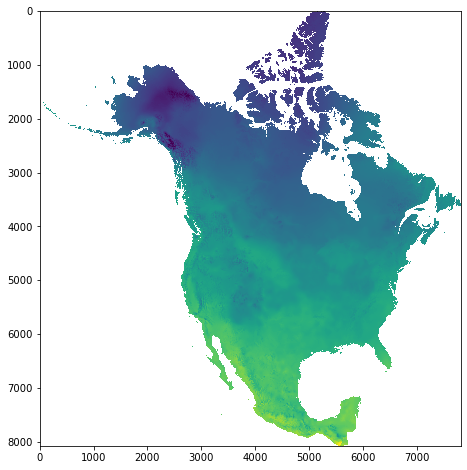

In [28]:
print(np.shape(tv))
print(np.nanmax(tv))
print(np.nanmin(tv))
print(np.nanmean(tv))
tvm = np.ma.masked_invalid(tv)
plt.imshow(tv[0,:,:])

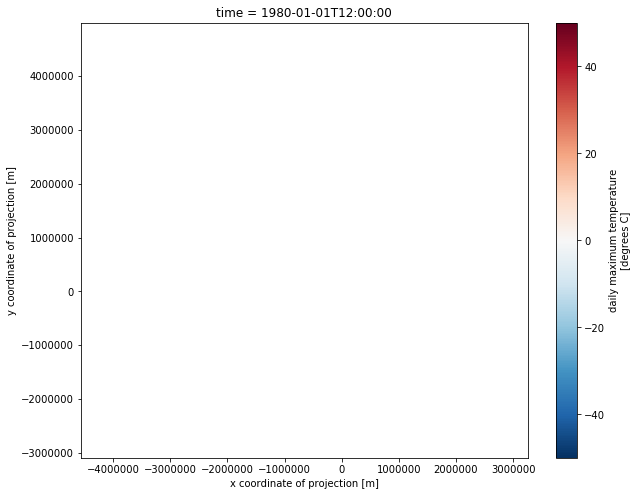

In [10]:
tmax = ds.tmax.isel(time=0)
# p = tmax.plot(col = 'time', aspect = ds.dims['x']/ds.dims['y'], size = 2)
tmax.plot(x = 'x', y='y')
# p = tmax.plot()
# p.axes.set_aspect('equal')
# plt.show()

In [ ]:
ds.tmax[0,3000,2000].plot()